In [53]:
import nltk
from textblob import TextBlob
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from urllib.request import urlopen
import re
import inflect
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from nltk import FreqDist
from collections import Counter
nltk.download('brown')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [54]:
p = inflect.engine()
lemmatizer = WordNetLemmatizer()

In [55]:
def read_book(url):
  return urlopen(url).read()

In [56]:
def print_book_title_and_length(book):
  print(book[:75],len(book))

In [57]:
def decode_book(book):
  return book.decode('utf-8')

In [58]:
def discard_useless_part (text):
  sidx = text.find('*** START OF THE PROJECT ')
  eidx = text.find('*** END OF THE PROJECT ')
  print("Discarding Before - ", sidx)
  print("Discarding After - ", eidx)
  text = text[sidx:eidx]
  return text

In [59]:
def to_lower(text):
  return text.lower()

In [60]:
def remove_URL(text):
    return re.sub(r"http\S+", "", text)

In [61]:
def decontracted(text):
    # specific
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)

    # general
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text

In [62]:
def remove_punctuation(text):
  tokens = word_tokenize(text)
  words = [word for word in tokens if word.isalpha()]
  return ' '.join(words)

In [63]:
def num2word(text):
  list_of_words = text.split()
  modified_text = []

  for word in list_of_words:
    if word.isdigit():
      number_in_word = p.number_to_words(word)
      modified_text.append(number_in_word)
    else:
      modified_text.append(word)
      
  return ' '.join(modified_text)

In [ ]:
def lemmatize_word(text): 
    word_tokens = word_tokenize(text)  
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens] 
    return ' '.join(lemmas) 

In [ ]:
url1 = 'http://www.gutenberg.org/files/66753/66753-0.txt'
url2 = 'http://www.gutenberg.org/files/66751/66751-0.txt'

def PreProcessedBook(url):
  book = read_book(url)
  print_book_title_and_length(book)
  text = decode_book(book)
  text = discard_useless_part(text)
  text = to_lower(text)
  text = remove_URL(text)
  text = decontracted(text)
  text = num2word(text)
  text = remove_punctuation(text)
  text = lemmatize_word(text)
  return (text)

In [ ]:
book1_text = PreProcessedBook(url1)
book2_text = PreProcessedBook(url2)

b"\xef\xbb\xbfThe Project Gutenberg eBook of Traitor's Choice, by Paul W. Fairman\r\n\r\nT" 38588
Discarding Before -  804
Discarding After -  19831
b'\xef\xbb\xbfThe Project Gutenberg eBook of The Heir, by Sydney C. Grier\r\n\r\nThis eBoo' 600232
Discarding Before -  764
Discarding After -  568709


In [ ]:
def noun(text):
  is_noun = lambda pos: pos[:1] == 'N'
  tokenized = nltk.word_tokenize(text)
  nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 
  return nouns

In [ ]:
noun1=noun(book1_text)
noun2=noun(book2_text)

In [ ]:
print("Number of nouns in book 1 are "+ str(len(noun1)))

Number of nouns in book 1 are 728


In [ ]:
print("Number of nouns book 2 are "+str(len(noun2)))

Number of nouns book 2 are 21271


In [ ]:
def verb(text):
  is_verb = lambda pos: pos[:1] == 'V'
  tokenized = nltk.word_tokenize(text)
  verbs = [word for (word, pos) in nltk.pos_tag(tokenized) if is_verb(pos)] 
  return verbs

In [ ]:
verb1=verb(book1_text)
verb2=verb(book2_text)

In [ ]:
print("Number of verbs in book 1 are "+ str(len(verb1)))

Number of verbs in book 1 are 647


In [ ]:
print("Number of verbs in book 2 are "+ str(len(verb2)))

Number of verbs in book 2 are 18773


In [ ]:
from nltk.corpus import wordnet as wn

In [ ]:
#gives the categories of nouns or verb that the word belongs to
from nltk.corpus import wordnet as wn
def synset(words):
  categories=[]
  for word in words:
    cat=[]
    for synset in wn.synsets(word):
      if(('noun' in synset.lexname()) & ('Tops' not in synset.lexname()) ):
        cat.append(synset.lexname())
      if('verb' in synset.lexname()):
        cat.append(synset.lexname())
    categories.append(cat)
  return categories

In [ ]:
noun_syn1=synset(noun1)
noun_syn2=synset(noun2)
verb_syn1=synset(verb1)
verb_syn2=synset(verb2)

In [ ]:
print(noun1[88])

course


In [ ]:
print(noun_syn1[88][:])

['noun.act', 'noun.group', 'noun.location', 'noun.act', 'noun.object', 'noun.group', 'noun.food', 'noun.artifact', 'noun.artifact', 'verb.motion', 'verb.motion', 'verb.competition']


In [ ]:
#GIVES TOTAL NOUN LEXNAMES AND TOTAL VERB LEXNAMES FOR FREQUENCY DISTRIBUTIONS
def all_synsets(no,ve):
  nouns=[]
  verbs=[]
  for word in no:
    for synset in wn.synsets(word): 
      if(('noun' in synset.lexname()) & ('Tops' not in synset.lexname()) ):
        nouns.append(synset.lexname())
      if('verb' in synset.lexname()):
        verbs.append(synset.lexname())
  for word in ve:
    for synset in wn.synsets(word): 
      if(('noun' in synset.lexname()) & ('Tops' not in synset.lexname()) ):
        nouns.append(synset.lexname())
      if('verb' in synset.lexname()):
        verbs.append(synset.lexname())
      
  return nouns,verbs

In [ ]:
noun_superset1,verb_superset1=all_synsets(noun1,verb1)
noun_superset2,verb_superset2=all_synsets(noun2,verb2)

In [ ]:
print(noun_superset1)

['noun.event', 'noun.time', 'noun.act', 'noun.act', 'noun.act', 'noun.location', 'noun.communication', 'noun.attribute', 'noun.act', 'noun.cognition', 'noun.person', 'noun.person', 'noun.person', 'noun.cognition', 'noun.act', 'noun.cognition', 'noun.person', 'noun.person', 'noun.cognition', 'noun.act', 'noun.cognition', 'noun.person', 'noun.person', 'noun.person', 'noun.act', 'noun.cognition', 'noun.event', 'noun.event', 'noun.attribute', 'noun.person', 'noun.person', 'noun.person', 'noun.body', 'noun.attribute', 'noun.attribute', 'noun.artifact', 'noun.person', 'noun.location', 'noun.body', 'noun.artifact', 'noun.communication', 'noun.communication', 'noun.attribute', 'noun.attribute', 'noun.artifact', 'noun.event', 'noun.phenomenon', 'noun.state', 'noun.time', 'noun.time', 'noun.person', 'noun.state', 'noun.act', 'noun.object', 'noun.person', 'noun.object', 'noun.person', 'noun.person', 'noun.person', 'noun.person', 'noun.person', 'noun.cognition', 'noun.cognition', 'noun.cognition',

In [ ]:
len(noun_superset1)

4990

([<matplotlib.axis.XTick at 0x7f230035b750>,
 [Text(0, 0, '0'),
  Text(0, 0, '1'),
  Text(0, 0, '2'),
  Text(0, 0, '3'),
  Text(0, 0, '4'),
  Text(0, 0, '5'),
  Text(0, 0, '6'),
  Text(0, 0, '7'),
  Text(0, 0, '8'),
  Text(0, 0, '9'),
  Text(0, 0, '10'),
  Text(0, 0, '11'),
  Text(0, 0, '12'),
  Text(0, 0, '13'),
  Text(0, 0, '14'),
  Text(0, 0, '15'),
  Text(0, 0, '16'),
  Text(0, 0, '17'),
  Text(0, 0, '18'),
  Text(0, 0, '19'),
  Text(0, 0, '20'),
  Text(0, 0, '21'),
  Text(0, 0, '22'),
  Text(0, 0, '23'),
  Text(0, 0, '24')])

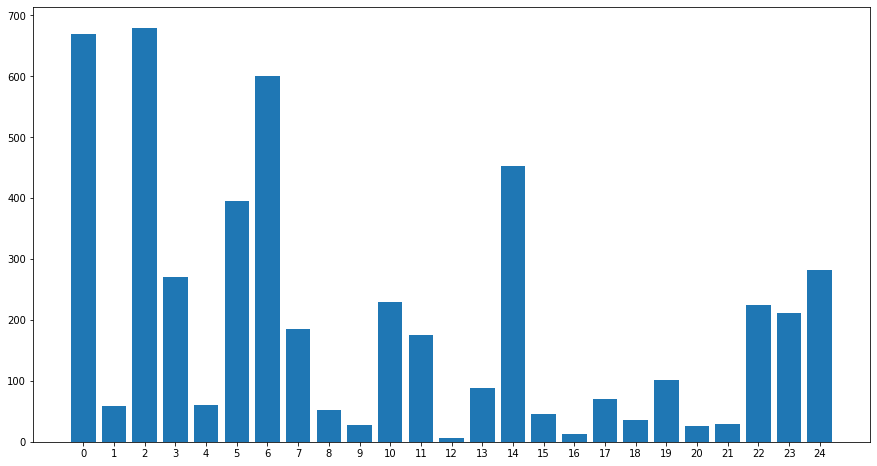

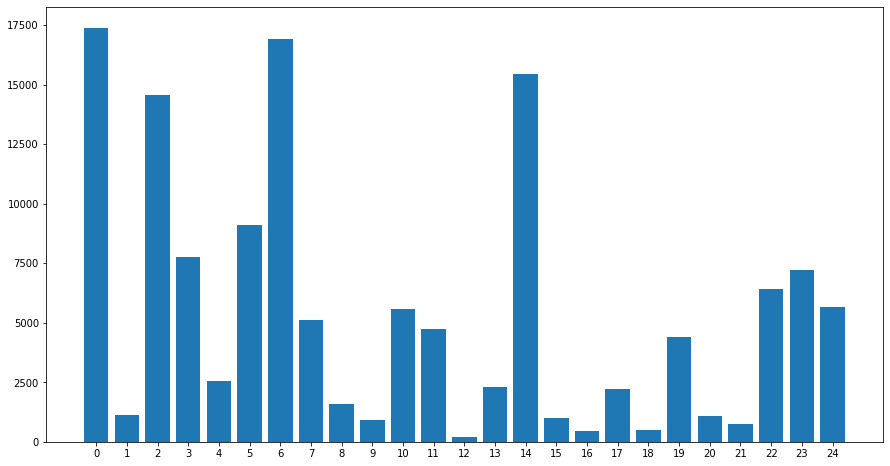

In [ ]:
import numpy as np
labels, counts = np.unique(noun_superset1,return_counts=True)
import matplotlib.pyplot as plt 
ticks = range(len(counts))
plt.figure(figsize=(15,8))
plt.bar(ticks,counts, align='center')
plt.xticks(ticks, range(len(labels)))
labels, counts = np.unique(noun_superset2,return_counts=True)
ticks = range(len(counts))
plt.figure(figsize=(15,8))
plt.bar(ticks,counts, align='center')
plt.xticks(ticks, range(len(labels)))

In [ ]:
print(labels)

['noun.act' 'noun.animal' 'noun.artifact' 'noun.attribute' 'noun.body'
 'noun.cognition' 'noun.communication' 'noun.event' 'noun.feeling'
 'noun.food' 'noun.group' 'noun.location' 'noun.motive' 'noun.object'
 'noun.person' 'noun.phenomenon' 'noun.plant' 'noun.possession'
 'noun.process' 'noun.quantity' 'noun.relation' 'noun.shape' 'noun.state'
 'noun.substance' 'noun.time']


([<matplotlib.axis.XTick at 0x7f22ffd76210>,
 [Text(0, 0, '0'),
  Text(0, 0, '1'),
  Text(0, 0, '2'),
  Text(0, 0, '3'),
  Text(0, 0, '4'),
  Text(0, 0, '5'),
  Text(0, 0, '6'),
  Text(0, 0, '7'),
  Text(0, 0, '8'),
  Text(0, 0, '9'),
  Text(0, 0, '10'),
  Text(0, 0, '11'),
  Text(0, 0, '12'),
  Text(0, 0, '13'),
  Text(0, 0, '14')])

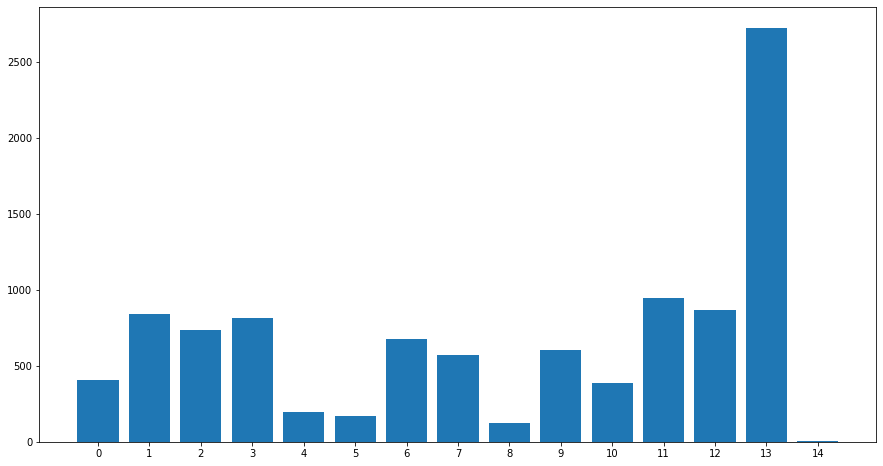

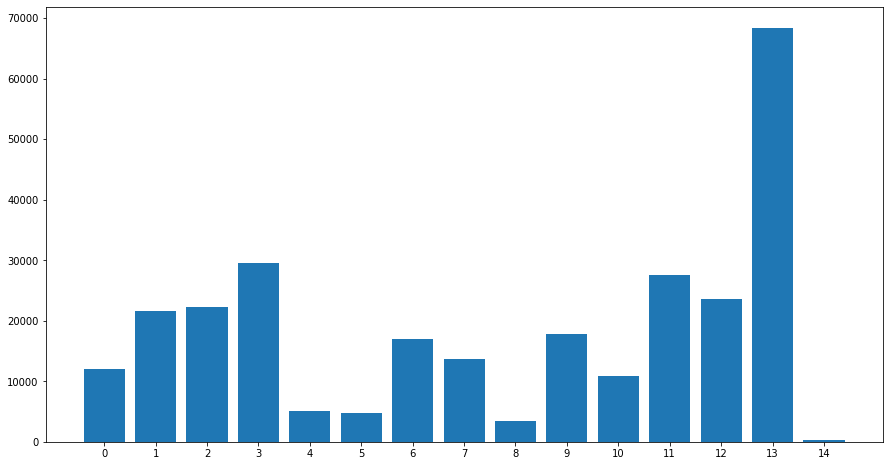

In [ ]:
labels, counts = np.unique(verb_superset1,return_counts=True)
ticks = range(len(counts))
plt.figure(figsize=(15,8))
plt.bar(ticks,counts, align='center')
plt.xticks(ticks, range(len(labels)))
labels, counts = np.unique(verb_superset2,return_counts=True)
ticks = range(len(counts))
plt.figure(figsize=(15,8))
plt.bar(ticks,counts, align='center')
plt.xticks(ticks, range(len(labels)))

In [ ]:
print(labels)

['verb.body' 'verb.change' 'verb.cognition' 'verb.communication'
 'verb.competition' 'verb.consumption' 'verb.contact' 'verb.creation'
 'verb.emotion' 'verb.motion' 'verb.perception' 'verb.possession'
 'verb.social' 'verb.stative' 'verb.weather']


In [ ]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
doc1 = nlp(book1_text)
doc2 = nlp(book2_text)

In [ ]:
print("there are total "+str(len(doc1.ents))+" entities in book 1 ")

there are total 109 entities in book 1 


In [ ]:
print(" there are total " +str(len(doc2.ents))+ " entities in book 2 ")

 there are total 2356 entities in book 2 


In [ ]:
book1_text

'start of the project gutenberg ebook traitor be choice traitor be choice by paul fairman kendall have a difficult decision to make if he defy the alien clare face a horrible death if he comply a whole planet must die transcriber be note this etext be produce from imagination stories of science and fantasy august one thousand nine hundred and extensive research do not uncover any evidence that the copyright on this publication be renew the phonovision bell ring reed kendall reach for the switch not take his eye off the blueprint that lay on his desk he speak absently yes the reply come sharp and cold i would suggest you stop what you be do and pay attention to me kendall raise his head and look at the screen the image that face him be that of a man a tall man in ordinary street clothe but wear an odd silver mask over his face kendall make no effort to hide his annoyance this be no time for joke some lab comedian with time on his hand now listen here i be busy and i be in no mood to shu

In [ ]:
print([(X, X.ent_iob_) for X in doc1])

[(start, 'O'), (of, 'O'), (the, 'O'), (project, 'O'), (gutenberg, 'O'), (ebook, 'O'), (traitor, 'O'), (be, 'O'), (choice, 'O'), (traitor, 'O'), (be, 'O'), (choice, 'O'), (by, 'O'), (paul, 'B'), (fairman, 'I'), (kendall, 'I'), (have, 'O'), (a, 'O'), (difficult, 'O'), (decision, 'O'), (to, 'O'), (make, 'O'), (if, 'O'), (he, 'O'), (defy, 'O'), (the, 'O'), (alien, 'O'), (clare, 'O'), (face, 'O'), (a, 'O'), (horrible, 'O'), (death, 'O'), (if, 'O'), (he, 'O'), (comply, 'O'), (a, 'O'), (whole, 'O'), (planet, 'O'), (must, 'O'), (die, 'O'), (transcriber, 'O'), (be, 'O'), (note, 'O'), (this, 'O'), (etext, 'O'), (be, 'O'), (produce, 'O'), (from, 'O'), (imagination, 'O'), (stories, 'O'), (of, 'O'), (science, 'O'), (and, 'O'), (fantasy, 'O'), (august, 'O'), (one, 'O'), (thousand, 'O'), (nine, 'O'), (hundred, 'O'), (and, 'O'), (extensive, 'O'), (research, 'O'), (do, 'O'), (not, 'O'), (uncover, 'O'), (any, 'O'), (evidence, 'O'), (that, 'O'), (the, 'O'), (copyright, 'O'), (on, 'O'), (this, 'O'), (publ

In [ ]:
print([(X, X.ent_iob_) for X in doc2])

[(start, 'O'), (of, 'O'), (the, 'O'), (project, 'O'), (gutenberg, 'O'), (ebook, 'O'), (the, 'O'), (heir, 'O'), (the, 'O'), (heir, 'O'), (by, 'O'), (sydney, 'B'), (grier, 'I'), (author, 'O'), (of, 'O'), (an, 'O'), (uncrowned, 'O'), (king, 'O'), (the, 'O'), (warden, 'O'), (of, 'O'), (the, 'O'), (march, 'O'), (etc, 'O'), (illustrations, 'O'), (by, 'O'), (george, 'B'), (percy, 'I'), (in, 'O'), (the, 'O'), (balkan, 'O'), (series, 'O'), (william, 'B'), (blackwood, 'I'), (and, 'O'), (sons, 'O'), (edinburgh, 'O'), (and, 'O'), (london, 'B'), (mcmvi, 'O'), (image, 'O'), (caption, 'O'), (his, 'O'), (arm, 'O'), (grip, 'O'), (by, 'O'), (one, 'B'), (of, 'O'), (the, 'O'), (brigands, 'O'), (trudge, 'O'), (silently, 'O'), (beside, 'O'), (her, 'O'), (content, 'O'), (de, 'O'), (jure, 'O'), (ii, 'O'), (of, 'O'), (the, 'O'), (stock, 'O'), (of, 'O'), (the, 'O'), (emperors, 'O'), (iii, 'O'), (the, 'O'), (orient, 'O'), (express, 'O'), (iv, 'O'), (a, 'O'), (full, 'O'), (stop, 'O'), (the, 'O'), (vi, 'O'), (a, '

In [ ]:
def entity_recognition(text):
  doc=nlp(text)
  person=[]
  org=[]
  location=[]
  for X in doc:  
    if (X.ent_type_=='PERSON') and X.text not in person:
      person.append(X.text)
    if (X.ent_type_=='ORG')and X.text not in org:
      org.append(X.text)
    if ((X.ent_type_=='LOC') or (X.ent_type_=='GPE')) and X.text not in location:
      location.append(X.text)
  return person,org,location

In [ ]:
person1,org1,location1=entity_recognition(book1_text)
person2,org2,location2=entity_recognition(book2_text)
print("number of person entities in book 1 and book 2 respectively are "+str(len(person1))+" and "+str(len(person2)))
print("number of organization entities in book 1 and book 2 respectively are "+str(len(org1))+" and "+str(len(org2)))
print("number of location entities in book 1 and book 2 respectively are "+str(len(location1))+" and "+str(len(location2)))

number of person entities in book 1 and book 2 respectively are 8 and 247
number of organization entities in book 1 and book 2 respectively are 12 and 74
number of location entities in book 1 and book 2 respectively are 1 and 65


In [ ]:
print(org1)

['kendall', 'cross', 'the', 'canadian', 'flats', 'ordnance', 'research', 'project', 'tray', 'careful', 'instructions', 'nova']


In [ ]:
def freq(str_list): 
    unique_words = set(str_list)
    counts = {}
    for words in unique_words : 
        counts[words] = str_list.count(words)
    return counts

In [ ]:
X = freq(person1)
print(sorted(X.items(), key = lambda kv:(kv[1], kv[0]),reverse=True))

[('yellowstone', 1), ('reed', 1), ('paul', 1), ('lie', 1), ('kendall', 1), ('hunt', 1), ('fairman', 1), ('clare', 1)]


In [ ]:
X = freq(location1)
print(sorted(X.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)) 

[('kendall', 1)]


In [ ]:
X = freq(org1)
print(sorted(X.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)) 

[('tray', 1), ('the', 1), ('research', 1), ('project', 1), ('ordnance', 1), ('nova', 1), ('kendall', 1), ('instructions', 1), ('flats', 1), ('cross', 1), ('careful', 1), ('canadian', 1)]


In [ ]:
def BookText(url):
  book = read_book(url)
  text = decode_book(book)
  text = to_lower(text)
  text = remove_URL(text)
  text = decontracted(text)
  text = num2word(text)
  return (text)

In [1]:
import nltk
import urllib.request
import urllib.parse
import urllib.error
import ssl
import json
import pandas as pd
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def metrics(truth, run):
    t = set(truth)
    r = set(run)
    intersection = r & t
    True_positive = float(len(intersection))
    if float(len(run)) >= float(True_positive):
        False_positive = len(run) - True_positive
    else:
        False_positive = True_positive - len(run)
    True_negative = 0
    if len(truth) >= len(run):
        False_negative = len(truth) - len(run)
    else:
        False_negative = 0
    accuracy = (float(True_positive) + float(True_negative)) / (float(True_positive) + float(True_negative) + float(False_positive) + float(False_negative))
    precision = float(True_positive) / (float(True_positive) + float(False_positive))
    recall = float(True_positive) / (float(True_positive) + float(False_negative))
    F_measure = (2 * recall * precision) / (recall + precision)
    print("Accuracy: ", accuracy)
    print("Recall: ", recall)
    print("Precision: ", precision)
    print("F-measure: ", F_measure)
    d = {'Predicted Negative': [True_negative, False_negative],
         'Predicted Positive': [False_positive, True_positive]}
    metricsdf = pd.DataFrame(d, index=['Negative Cases', 'Positive Cases'])
    return metricsdf

In [3]:
print('--------------------------------------------------------------------------------------------------')
print('Downloading books')
site1 =  'http://www.gutenberg.org/files/66753/66753-0.txt'
print('Extracting ', site1)
uh1 = urllib.request.urlopen(site1)
data1 = uh1.read().decode('utf8')

--------------------------------------------------------------------------------------------------
Extracting  http://www.gutenberg.org/files/66753/66753-0.txt


In [5]:
site2 = 'http://www.gutenberg.org/files/66751/66751-0.txt'
print('Extracting ', site2)
uh2 = urllib.request.urlopen(site2)
data2 = uh2.read().decode('utf8')
print('Downloading of books complete')
print('--------------------------------------------------------------------------------------------------')

Extracting  http://www.gutenberg.org/files/66751/66751-0.txt
--------------------------------------------------------------------------------------------------


In [8]:
# tokenizing
print('Tokenizing the texts of the books')
token1 = nltk.word_tokenize(data1)
token2 = nltk.word_tokenize(data2)
print('Tokenizing done')
print('--------------------------------------------------------------------------------------------------')

Tokenizing the texts of the books
Tokenizing done
--------------------------------------------------------------------------------------------------


In [7]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
# pos tagging
print('POS tagging')
tagged1 = nltk.pos_tag(token1)
tagged2 = nltk.pos_tag(token2)
print('POS tagging done')
print('--------------------------------------------------------------------------------------------------')

POS tagging
POS tagging done
--------------------------------------------------------------------------------------------------


In [10]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [16]:
# NER
print('Named entity recognition')
namedEnt1 = nltk.ne_chunk(tagged1)
namedEnt2 = nltk.ne_chunk(tagged2)
print('Named entity recognition done')
print('--------------------------------------------------------------------------------------------------')

Named entity recognition
Named entity recognition done
--------------------------------------------------------------------------------------------------


In [13]:
import nltk
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


True

In [15]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [37]:
print('Running NER on random paragraphs from books to evaluate the algorithm')
print('')
print('Paragraph-1 :')
data1 = "Kendall thought of Clare, trying the while to keep his panic from showing through. Blonde, beautiful Clare--the one person who really made his life worth living. Clare. As he worked at this brutal, tedious defense business, he did not work for the defense of Terra, though that idea and its psychological drive was ever in his conscious mind. He worked to keep Clare safe and now he realized the stark fact; realized it as he cursed the Centaurians and their devilish extrasensory penetration; cursed this masked devil for being right."
token = nltk.word_tokenize(data1)
tagged = nltk.pos_tag(token)
chunked = nltk.ne_chunk(tagged)

Running NER on random paragraphs from books to evaluate the algorithm

Paragraph-1 :


In [38]:
run = []
truth = ['Kendall', 'Clare', 'Blonde', 'Terra', 'devil', 'Centuarians']

In [39]:
for chunk in chunked:
    if hasattr(chunk, 'label'):
        if chunk.label() == 'PERSON':
            # print(chunk.label(), ' '.join(c[0] for c in chunk))
            ne = ' '.join(c[0] for c in chunk)
            run.append(ne)

In [40]:
print('Maunally labelled PERSON entities : ')
print(set(truth))
print('')
print('Algorithm labelled PERSON entities : ')
print(set(run))
print('')
print('Evaluation :')
print(metrics(truth, run))

Maunally labelled PERSON entities : 
{'devil', 'Blonde', 'Kendall', 'Centuarians', 'Clare', 'Terra'}

Algorithm labelled PERSON entities : 
{'Blonde', 'Clare'}

Evaluation :
Accuracy:  0.3333333333333333
Recall:  0.4
Precision:  0.6666666666666666
F-measure:  0.5
                Predicted Negative  Predicted Positive
Negative Cases                   0                 1.0
Positive Cases                   3                 2.0


In [41]:
print('\n')

In [42]:
print('Paragraph-2 :')
data2 = "print('Paragraph-2 :')"
data2 = "Professor Panagiotis peered at the document with a hungry look. “You are right,” he said; “it is priceless. Your family has dwindled strangely, Mr Teffany. I cannot tell you how many collateral branches I have followed up, only to find that they died out, while the direct line was in existence unknown to me. Oh, Maurice, look!” cried Zoe. “Isn’t it funny? Do you see that the beginning of the parchment is sealed down? There must be some secret charge, or something of that sort, inside. By no means, sir. The missing Nicholas is buried in Westminster Abbey. Doubtless he died when on a visit to London. The schismatics, with Scythia working behind them,” was the reply. “By immemorial right and tradition Emathia is a Greek country, but agitators are being sent among the people--ours predominantly by race, converted, shepherded, educated by us--to persuade them by bribes and threats to declare themselves Thracians, Dardanians, even Dacians--anything that may give colour to the fiction of Slav descent, and consequently alienate them from us."
token = nltk.word_tokenize(data2)
tagged = nltk.pos_tag(token)
chunked = nltk.ne_chunk(tagged)

Paragraph-2 :


In [43]:
run = []
truth = ['Panagiotis', 'Teffany', 'Maurice', 'Zoe', 'Nicholas', 'Abbey', 'Scythia', 'Emathia']

In [44]:
for chunk in chunked:
    if hasattr(chunk, 'label'):
        if chunk.label() == 'PERSON':
            # print(chunk.label(), ' '.join(c[0] for c in chunk))
            ne = ' '.join(c[0] for c in chunk)
            run.append(ne)

In [45]:
print('Maunally labelled PERSON entities : ')
print(set(truth))
print('')
print('Alogorithm labelled PERSON entities : ')
print(set(run))
print('')
print('Evaluation :')
print(metrics(truth, run))
print('--------------------------------------------------------------------------------------------------')

Maunally labelled PERSON entities : 
{'Teffany', 'Nicholas', 'Scythia', 'Emathia', 'Panagiotis', 'Zoe', 'Abbey', 'Maurice'}

Alogorithm labelled PERSON entities : 
{'Isn', 'Nicholas', 'Scythia', 'Emathia', 'Panagiotis', 'Zoe'}

Evaluation :
Accuracy:  0.625
Recall:  0.7142857142857143
Precision:  0.8333333333333334
F-measure:  0.7692307692307692
                Predicted Negative  Predicted Positive
Negative Cases                   0                 1.0
Positive Cases                   2                 5.0
--------------------------------------------------------------------------------------------------


In [46]:
# Part 3 TF-IDF VECTORS 

In [65]:
url1 = 'http://www.gutenberg.org/files/66753/66753-0.txt'
url2 = 'http://www.gutenberg.org/files/66751/66751-0.txt'
url3 = 'http://www.gutenberg.org/files/66981/66981-0.txt'

In [66]:
def PreProcessedBook2(url):
  book = read_book(url)
  print_book_title_and_length(book)
  text = decode_book(book)
  text = discard_useless_part(text)
  text = to_lower(text)
  text = remove_URL(text)
  text = decontracted(text)
  text = num2word(text)
  text = remove_punctuation(text)
  return (text)

In [80]:
Book1 = PreProcessedBook2(url1)
Book2 = PreProcessedBook2(url2)
Book3 = PreProcessedBook2(url3)

b"\xef\xbb\xbfThe Project Gutenberg eBook of Traitor's Choice, by Paul W. Fairman\r\n\r\nT" 38588
Discarding Before -  804
Discarding After -  19831
b'\xef\xbb\xbfThe Project Gutenberg eBook of The Heir, by Sydney C. Grier\r\n\r\nThis eBoo' 600232
Discarding Before -  764
Discarding After -  568709
b'\xef\xbb\xbfThe Project Gutenberg eBook of Law Rustlers, by W. C. Tuttle\r\n\r\nThis eBo' 98470
Discarding Before -  677
Discarding After -  75795


In [81]:
# Before Lemmatization
data = [Book1,Book2]

In [91]:
import pandas as pd

def create_dataframe(matrix, tokens):

    doc_names = [f'text_book{i+1}' for i, _ in enumerate(matrix)]
    df = pd.DataFrame(data=matrix, index=doc_names, columns=tokens)
    return(df)

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer

Tfidf_vect = TfidfVectorizer()
vector_matrix = Tfidf_vect.fit_transform(data)

tokens = Tfidf_vect.get_feature_names()
create_dataframe(vector_matrix.toarray(),tokens)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abandon,abandoning,abashed,abbey,abbot,able,abodes,abortive,about,above,abraham,abroad,abruptly,absence,absent,absently,absolute,absolutely,absorbed,absorption,absurd,absurdity,absurdly,abundant,abuse,abusing,accent,accents,accentuate,accept,acceptable,acceptance,accepted,accepting,access,accession,accident,accidentally,accommodate,accommodated,...,xxiv,xxv,yard,yards,yataghans,year,years,yelling,yellowstone,yes,yesterday,yet,yield,yielded,yielding,yields,york,you,young,younger,youngest,your,yours,yourself,yourselves,youth,youthful,zat,ze,zeal,zeko,zem,zen,zere,zerefore,zese,zey,zis,zoe,œcumenical
text_book1,0.000000,0.000000,0.000000,0.000000,0.000000,0.003255,0.000000,0.000000,0.003255,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004575,0.006510,0.000000,0.000000,0.000000,0.003255,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00915,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003255,0.000000,0.022875,0.019531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.185543,0.003255,0.000000,0.000000,0.058593,0.003255,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
text_book2,0.000302,0.000151,0.000151,0.000603,0.000302,0.004615,0.000151,0.000151,0.020283,0.003771,0.000151,0.000452,0.000603,0.000754,0.000452,0.000000,0.000537,0.002112,0.000302,0.000302,0.000966,0.000151,0.000151,0.000151,0.000151,0.000151,0.000302,0.000603,0.000151,0.002413,0.000151,0.000151,0.001961,0.000452,0.00000,0.000151,0.001659,0.000151,0.000151,0.000452,...,0.000302,0.000302,0.000151,0.000302,0.000151,0.000452,0.001932,0.000151,0.000000,0.003863,0.001357,0.005732,0.000302,0.000302,0.000151,0.000151,0.000151,0.182761,0.004615,0.001961,0.000151,0.040673,0.001932,0.004525,0.000603,0.000754,0.000603,0.001207,0.004676,0.000302,0.003469,0.000151,0.000302,0.000452,0.000151,0.000151,0.000302,0.000302,0.085822,0.000452


In [84]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity_matrix = cosine_similarity(vector_matrix)
create_dataframe(cosine_similarity_matrix,['Book1','Book2'])

,Book1,Book2
text_book1,1.000000,0.892343
text_book2,0.892343,1.000000


In [85]:
data = [Book1,Book3]

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer

Tfidf_vect = TfidfVectorizer()
vector_matrix = Tfidf_vect.fit_transform(data)

tokens = Tfidf_vect.get_feature_names()
create_dataframe(vector_matrix.toarray(),tokens)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,able,abolish,about,above,absently,absolute,absolutely,absurd,accept,accepts,access,accomplished,accorded,accusing,across,action,active,actors,acts,actually,adds,admire,admires,admit,admits,admitted,adopt,advanced,adventure,advertisin,advice,advises,affairs,afraid,after,again,against,age,agony,agree,...,work,worked,working,works,world,worst,worth,worthwhile,would,wouldn,wounded,wrapped,write,writes,wrong,wrote,yanked,yanks,yard,yards,ye,year,years,yell,yellowstone,yells,yelp,yelps,yes,yesterday,yet,yolo,yore,you,young,your,yours,yourself,yuh,zowie
text_book1,0.003242,0.00000,0.003242,0.000000,0.004557,0.009113,0.00000,0.004557,0.00000,0.00000,0.009113,0.01367,0.004557,0.004557,0.003242,0.00000,0.00000,0.004557,0.00000,0.004557,0.00000,0.00000,0.00000,0.004557,0.00000,0.004557,0.00000,0.004557,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.032421,0.009726,0.019453,0.00000,0.004557,0.003242,...,0.006484,0.009726,0.006484,0.003242,0.019453,0.00000,0.003242,0.004557,0.087536,0.000000,0.00000,0.00000,0.00000,0.00000,0.003242,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.004557,0.00000,0.022783,0.000000,0.00000,0.000000,0.019453,0.00000,0.000000,0.00000,0.00000,0.184799,0.004557,0.058358,0.004557,0.00000,0.00000,0.00000
text_book2,0.001622,0.00114,0.030014,0.005701,0.000000,0.000000,0.00114,0.000000,0.00342,0.00114,0.000000,0.00000,0.000000,0.000000,0.008923,0.00342,0.00114,0.000000,0.00114,0.000000,0.00114,0.00114,0.00114,0.000000,0.00114,0.000000,0.00228,0.000000,0.00114,0.00114,0.00342,0.00228,0.00114,0.00228,0.012168,0.009734,0.014602,0.00114,0.000000,0.001622,...,0.003245,0.001622,0.000811,0.003245,0.002434,0.00456,0.000811,0.000000,0.013790,0.009121,0.00114,0.00114,0.00228,0.00114,0.002434,0.00114,0.00114,0.00228,0.00114,0.00342,0.00114,0.005701,0.000000,0.00114,0.000000,0.020522,0.00114,0.005701,0.003245,0.00114,0.005701,0.00228,0.00114,0.109512,0.000000,0.034071,0.000000,0.00228,0.09919,0.00114


In [87]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity_matrix = cosine_similarity(vector_matrix)
create_dataframe(cosine_similarity_matrix,['Book1','Book3'])

,Book1,Book3
text_book1,1.000000,0.777991
text_book2,0.777991,1.000000


In [90]:
data = [Book2,Book3]

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer

Tfidf_vect = TfidfVectorizer()
vector_matrix = Tfidf_vect.fit_transform(data)

tokens = Tfidf_vect.get_feature_names()
create_dataframe(vector_matrix.toarray(),tokens)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abandon,abandoning,abashed,abbey,abbot,able,abodes,abolish,abortive,about,above,abraham,abroad,abruptly,absence,absent,absolute,absolutely,absorbed,absorption,absurd,absurdity,absurdly,abundant,abuse,abusing,accent,accents,accentuate,accept,acceptable,acceptance,accepted,accepting,accepts,accession,accident,accidentally,accommodate,accommodated,...,yell,yelling,yells,yelp,yelps,yes,yesterday,yet,yield,yielded,yielding,yields,yolo,yore,york,you,young,younger,youngest,your,yours,yourself,yourselves,youth,youthful,yuh,zat,ze,zeal,zeko,zem,zen,zere,zerefore,zese,zey,zis,zoe,zowie,œcumenical
text_book1,0.000302,0.000151,0.000151,0.000604,0.000302,0.004618,0.000151,0.000000,0.000151,0.020299,0.002685,0.000151,0.000453,0.000604,0.000755,0.000453,0.000755,0.001504,0.000302,0.000302,0.001359,0.000151,0.000151,0.000151,0.000151,0.000151,0.000302,0.000604,0.000151,0.001718,0.000151,0.000151,0.001962,0.000453,0.000000,0.000151,0.00166,0.000151,0.000151,0.000453,...,0.000000,0.000151,0.000000,0.000000,0.000000,0.003866,0.000967,0.004081,0.000302,0.000302,0.000151,0.000151,0.000000,0.000000,0.000151,0.182904,0.006491,0.001962,0.000151,0.040705,0.002717,0.003222,0.000604,0.000755,0.000604,0.000000,0.001208,0.004679,0.000302,0.003472,0.000151,0.000302,0.000453,0.000151,0.000151,0.000302,0.000302,0.08589,0.000000,0.000453
text_book2,0.000000,0.000000,0.000000,0.000000,0.000000,0.001647,0.000000,0.001157,0.000000,0.030467,0.004117,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000823,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002470,0.000000,0.000000,0.000000,0.000000,0.001157,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.001157,0.000000,0.020832,0.001157,0.005787,0.003294,0.000823,0.004117,0.000000,0.000000,0.000000,0.000000,0.002315,0.001157,0.000000,0.111164,0.000000,0.000000,0.000000,0.034584,0.000000,0.001647,0.000000,0.000000,0.000000,0.100686,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.001157,0.000000


In [93]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity_matrix = cosine_similarity(vector_matrix)
create_dataframe(cosine_similarity_matrix,['Book2','Book3'])

,Book2,Book3
text_book1,1.00000,0.84377
text_book2,0.84377,1.00000


In [94]:
#after lemmatization
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
lemmatizer = WordNetLemmatizer()
def nltk2wn_tag(nltk_tag):
  if nltk_tag.startswith('J'):
    return wordnet.ADJ
  elif nltk_tag.startswith('V'):
    return wordnet.VERB
  elif nltk_tag.startswith('N'):
    return wordnet.NOUN
  elif nltk_tag.startswith('R'):
    return wordnet.ADV
  else:                    
    return None

In [95]:
def lemmatize_sentence(sentence):
  nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))    
  wn_tagged = map(lambda x: (x[0], nltk2wn_tag(x[1])), nltk_tagged)
  res_words = []
  for word, tag in wn_tagged:
    if tag is None:                        
      res_words.append(word)
    else:
      res_words.append(lemmatizer.lemmatize(word, tag))
  return " ".join(res_words)

In [96]:
Book1 = lemmatize_sentence(Book1)
Book2 = lemmatize_sentence(Book2)
Book3 = lemmatize_sentence(Book3)

In [97]:
data = [Book1,Book2]

In [98]:


from sklearn.feature_extraction.text import TfidfVectorizer

Tfidf_vect = TfidfVectorizer()
vector_matrix = Tfidf_vect.fit_transform(data)

tokens = Tfidf_vect.get_feature_names()
create_dataframe(vector_matrix.toarray(),tokens)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abandon,abashed,abbey,abbot,able,abode,abortive,about,above,abraham,abroad,abruptly,absence,absent,absently,absolute,absolutely,absorb,absorption,absurd,absurdity,absurdly,abundant,abuse,accent,accentuate,accept,acceptable,acceptance,access,accession,accident,accidentally,accommodate,accommodation,accompaniment,accompany,accomplice,accomplish,accomplished,...,xvi,xvii,xviii,xx,xxi,xxii,xxiii,xxiv,xxv,yard,yataghan,year,yell,yellowstone,yes,yesterday,yet,yield,york,you,young,your,yours,yourself,yourselves,youth,youthful,zat,ze,zeal,zeko,zem,zen,zere,zerefore,zese,zey,zis,zoe,œcumenical
text_book1,0.000000,0.00000,0.000000,0.000000,0.002914,0.00000,0.00000,0.002914,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.004095,0.005828,0.000000,0.000000,0.000000,0.002914,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.008191,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005828,0.002914,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.002914,0.00000,0.020477,0.017483,0.000000,0.000000,0.000000,0.00000,0.166093,0.002914,0.052450,0.002914,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
text_book2,0.000419,0.00014,0.000558,0.000279,0.004269,0.00014,0.00014,0.018764,0.003488,0.00014,0.000419,0.000558,0.000698,0.000419,0.000000,0.000496,0.001954,0.000279,0.000279,0.000894,0.00014,0.00014,0.00014,0.000279,0.000837,0.00014,0.004465,0.00014,0.00014,0.000000,0.00014,0.001535,0.00014,0.000698,0.000419,0.000279,0.000837,0.000419,0.000496,0.000099,...,0.000279,0.000279,0.000279,0.000279,0.000279,0.000279,0.000279,0.000279,0.000279,0.000419,0.00014,0.002085,0.00014,0.000000,0.003574,0.001256,0.005302,0.000837,0.00014,0.169079,0.005659,0.037628,0.001787,0.004186,0.000558,0.000698,0.000558,0.001116,0.004326,0.000279,0.003209,0.00014,0.000279,0.000419,0.00014,0.00014,0.000279,0.000279,0.079397,0.000419


In [100]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity_matrix = cosine_similarity(vector_matrix)
create_dataframe(cosine_similarity_matrix,['book1','book2'])

,book1,book2
text_book1,1.000000,0.907687
text_book2,0.907687,1.000000


In [101]:
data = [Book1,Book3]

from sklearn.feature_extraction.text import TfidfVectorizer

Tfidf_vect = TfidfVectorizer()
vector_matrix = Tfidf_vect.fit_transform(data)

tokens = Tfidf_vect.get_feature_names()
create_dataframe(vector_matrix.toarray(),tokens)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,able,abolish,about,above,absently,absolute,absolutely,absurd,accept,access,accomplish,accomplished,accord,accuse,across,act,action,active,actor,actually,add,admire,admit,adopt,advanced,adventure,advertisin,advice,advise,advises,affair,afraid,after,again,against,age,agony,agree,agrees,ahead,...,within,without,witness,woman,won,wonder,wonderin,wood,word,work,worked,world,worth,worthwhile,would,wouldn,wounded,wrap,write,wrong,yank,yard,ye,year,yell,yellowstone,yelp,yelps,yes,yesterday,yet,yolo,yore,you,young,your,yours,yourself,yuh,zowie
text_book1,0.002904,0.000000,0.002904,0.000000,0.004081,0.008163,0.000000,0.004081,0.000000,0.008163,0.008163,0.004081,0.004081,0.004081,0.002904,0.000000,0.000000,0.000000,0.004081,0.004081,0.000000,0.000000,0.005808,0.000000,0.004081,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029040,0.008712,0.017424,0.000000,0.004081,0.002904,0.000000,0.008712,...,0.005808,0.016326,0.004081,0.00000,0.000000,0.002904,0.000000,0.000000,0.011616,0.023232,0.000000,0.017424,0.002904,0.004081,0.078408,0.000000,0.000000,0.000000,0.000000,0.002904,0.000000,0.000000,0.000000,0.002904,0.000000,0.020407,0.000000,0.000000,0.017424,0.000000,0.000000,0.000000,0.000000,0.165528,0.004081,0.052272,0.004081,0.000000,0.0000,0.000000
text_book2,0.001582,0.001111,0.029261,0.005557,0.000000,0.000000,0.001111,0.000000,0.004446,0.000000,0.000000,0.000000,0.000000,0.000000,0.008699,0.001111,0.003334,0.001111,0.000000,0.000000,0.001111,0.002223,0.000791,0.002223,0.000000,0.001111,0.001111,0.003334,0.001111,0.001111,0.001111,0.002223,0.011863,0.009490,0.014235,0.001111,0.000000,0.001582,0.001111,0.002373,...,0.000791,0.000000,0.000000,0.00778,0.001111,0.003954,0.001111,0.001111,0.007908,0.007118,0.002223,0.002373,0.000791,0.000000,0.013444,0.008892,0.001111,0.001111,0.004446,0.002373,0.003334,0.004446,0.001111,0.003954,0.021118,0.000000,0.005557,0.001111,0.003163,0.001111,0.005557,0.002223,0.001111,0.106763,0.000000,0.033215,0.000000,0.002223,0.0967,0.001111


In [102]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity_matrix = cosine_similarity(vector_matrix)
create_dataframe(cosine_similarity_matrix,['book1','book3'])

,book1,book3
text_book1,1.000000,0.778361
text_book2,0.778361,1.000000


In [103]:
data = [Book2,Book3]

from sklearn.feature_extraction.text import TfidfVectorizer

Tfidf_vect = TfidfVectorizer()
vector_matrix = Tfidf_vect.fit_transform(data)

tokens = Tfidf_vect.get_feature_names()
create_dataframe(vector_matrix.toarray(),tokens)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abandon,abashed,abbey,abbot,able,abode,abolish,abortive,about,above,abraham,abroad,abruptly,absence,absent,absolute,absolutely,absorb,absorption,absurd,absurdity,absurdly,abundant,abuse,accent,accentuate,accept,acceptable,acceptance,accession,accident,accidentally,accommodate,accommodation,accompaniment,accompany,accomplice,accomplish,accomplished,accord,...,xxiv,xxv,yank,yard,yataghan,ye,year,yell,yelp,yelps,yes,yesterday,yet,yield,yolo,yore,york,you,young,your,yours,yourself,yourselves,youth,youthful,yuh,zat,ze,zeal,zeko,zem,zen,zere,zerefore,zese,zey,zis,zoe,zowie,œcumenical
text_book1,0.000419,0.00014,0.000559,0.000279,0.004273,0.00014,0.000000,0.00014,0.018780,0.002484,0.00014,0.000419,0.000559,0.000698,0.000419,0.000698,0.001391,0.000279,0.000279,0.001257,0.00014,0.00014,0.00014,0.000279,0.000838,0.00014,0.003180,0.00014,0.00014,0.00014,0.001536,0.00014,0.000698,0.000419,0.000279,0.000838,0.000419,0.000698,0.00014,0.000698,...,0.000279,0.000279,0.000000,0.000298,0.00014,0.000000,0.002087,0.000099,0.000000,0.000000,0.003577,0.000894,0.003776,0.000838,0.000000,0.000000,0.00014,0.169219,0.00796,0.037659,0.002514,0.002981,0.000559,0.000698,0.000559,0.000000,0.001117,0.004329,0.000279,0.003212,0.00014,0.000279,0.000419,0.00014,0.00014,0.000279,0.000279,0.079463,0.000000,0.000419
text_book2,0.000000,0.00000,0.000000,0.000000,0.001595,0.00000,0.001121,0.00000,0.029516,0.003989,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000798,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,0.003191,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.003364,0.003191,0.00000,0.001121,0.003989,0.015157,0.005606,0.001121,0.003191,0.000798,0.003989,0.000000,0.002242,0.001121,0.00000,0.107693,0.00000,0.033504,0.000000,0.001595,0.000000,0.000000,0.000000,0.097542,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.001121,0.000000


In [104]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity_matrix = cosine_similarity(vector_matrix)
create_dataframe(cosine_similarity_matrix,['book2','book3'])

,book2,book3
text_book1,1.000000,0.848678
text_book2,0.848678,1.000000
